In [1]:
from sklearn import datasets
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
raw_data = datasets.load_boston()

In [11]:
type(raw_data)

sklearn.utils.Bunch

In [5]:
x = raw_data.data
y = raw_data.target

In [12]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

### 直接整個下去 train

In [8]:
regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor.fit(x, y)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### 使用joblib.dump匯出預測器

In [13]:
from sklearn.externals import joblib
joblib.dump(regressor,'boston_svr.pkl')

C:\Users\Puff\Anaconda3\envs\ImgNrlz\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['boston_svr.pkl']

In [15]:
regressor = joblib.load('boston_svr.pkl')

In [19]:
predict_y = regressor.predict(raw_data.data[2].reshape(1, -1))

### 使用score計算準確率

In [21]:
predict = regressor.predict(x)
regressor.score(x,y)

0.999882732476161

### 繪出預測結果與實際目標差異圖

Text(0, 0.5, 'Measured')

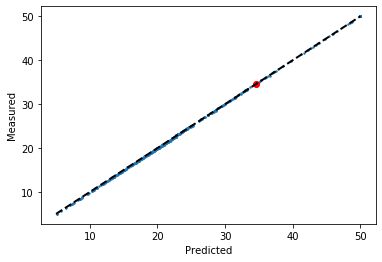

In [36]:
plt.scatter(predict,y,s=2) # s 是點的大小
plt.plot(predict_y, predict_y, 'ro')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')